In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

In [5]:
df = pd.read_csv('../data/user_test.csv')
df_gpu = df[df['emulator'] == 'gpu']
df_cpu = df[df['emulator'] == 'cpu']

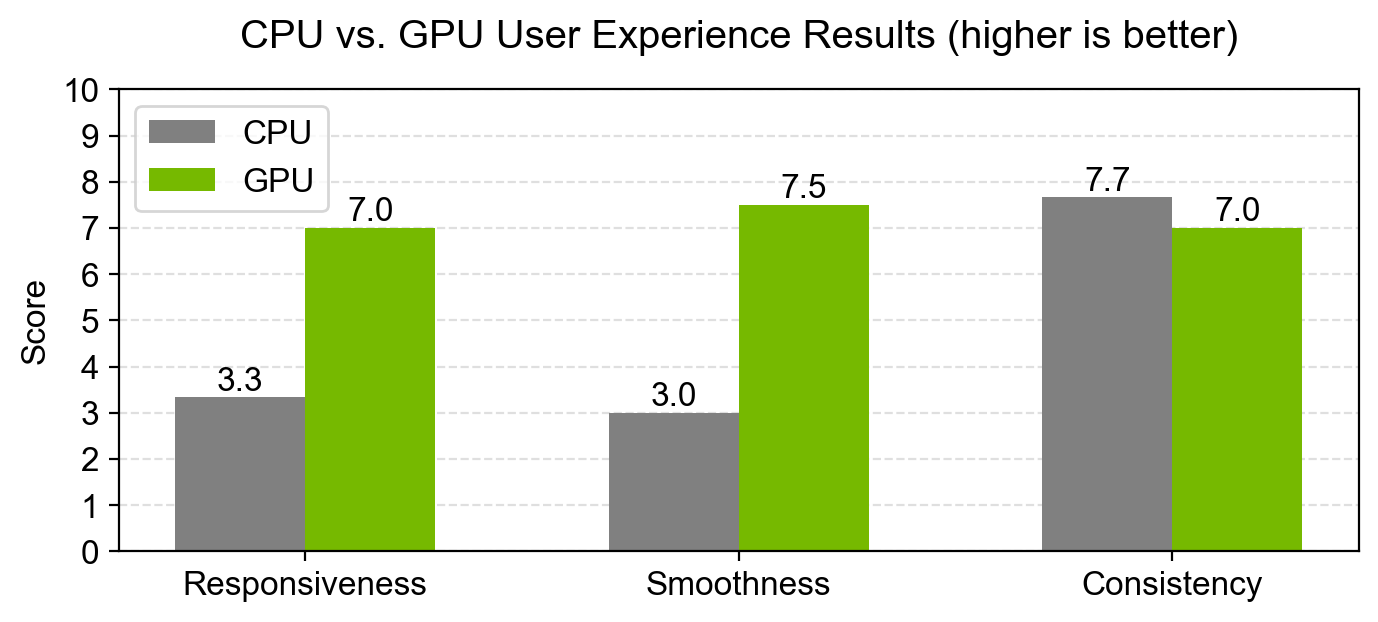

In [6]:
ax: plt.Axes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 3), dpi=200, sharey=True)

plt.title("CPU vs. GPU User Experience Results (higher is better)", pad=15)

metrics = ['responsiveness', 'smoothness', 'consistency']

cases = np.arange(len(metrics))
ax.set_xticks(cases, labels=[metric.capitalize() for metric in metrics])

ax.bar(cases - 0.15, df_cpu[metrics].mean(), width=0.3, label='CPU', color='grey')
ax.bar(cases + 0.15, df_gpu[metrics].mean(), width=0.3, label='GPU', color='#76B900')

ax.set_yticks(ticks=np.arange(0, 11))
ax.set_ylabel("Score")
ax.legend()
ax.set_axisbelow(True)

ax.grid(axis='y', which='major', visible=True, linestyle='--', color='grey', alpha=0.25)
ax.tick_params(axis='y', which='both', labelbottom=True)

for i, metric in enumerate(metrics):
    cpu_mean = df_cpu[metric].mean()
    gpu_mean = df_gpu[metric].mean()

    kw = { 'ha': 'center', 'va': 'bottom' }

    ax.text(i - 0.15, cpu_mean, round(cpu_mean, 1), **kw)
    ax.text(i + 0.15, gpu_mean, round(gpu_mean, 1), **kw)


plt.show()
